# Global Power Plant Database Project

## Submitted by Prashant Shekhar

Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#To print all columns and all rows
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [4]:
#importing data
df=pd.read_csv("D:/Global.csv") #Reading csv file
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


## Data description:

In this perticular problem i have two targets i have to find out predictions for Fuel type and capacity_mw.

If i consider Fuel type as target then i have to take classification models to predict and
If i consider capacity_mw as target then i have to take Regression models to predict.

In [6]:
#Lets rename the column primary_fuel with Fuel_type as in the statement it is asked to predict Fuel_type
df.rename(columns={'primary_fuel':'Fuel_type'},inplace=True)

## EDA:

In [5]:
#Checking shape of dataset
df.shape

(907, 27)

In this perticular dataset i have 907 rows and 25 columns.

In [8]:

#Checking all column names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Above are the column names of my dataset.

In [9]:
#Checking the data types of all columns
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Above are the data types of each column in the dataset.

In [10]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

I can clearly observe that there are some null values in some columns of the dataset.
other_fuel3, wepp_id and estimated_generation_gwh has all NaN values keeping all the values in a column as NaN has no meaning so i can drop these 3 columns.
other_fuel2 has only one non null value which means all other values are NaN so this column also has nothing to do with my data training.

In [7]:
#Droping unnecessary columns
df = df.drop(["other_fuel3"],axis=1)
df = df.drop(["wepp_id"],axis=1)
df = df.drop(["estimated_generation_gwh"],axis=1)
df = df.drop(["other_fuel2"],axis=1)

In [12]:
#Checking unique values of each column
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013         0
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_gwh_2019         0
generation_data_source      1
dtype: int64

country, country_long, year_of_capacity_data and generation_data_source has only one unique count which means all the values of the column are same so no need to keep all these columns unnecessarily.

In [8]:
#Droping unnecessary columns
df = df.drop(["country"],axis=1)
df = df.drop(["country_long"],axis=1)
df = df.drop(["year_of_capacity_data"],axis=1)
df = df.drop(["generation_data_source"],axis=1)

In [16]:
#Printing the data set after removing columns
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN


In [9]:
#lets check the name column entries
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [10]:
#lets check the gppd_idnr column entries
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


gppd_idnr also has all the values unique so let me drop it since it can not contribute to model training.

In [11]:
#lets check entries in source column
df["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [12]:
#lets check entries in source column
df["owner"].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

Owner also looks like an unnecessary column since keeping all owner names will never distrub or give inputs to my prediction so i think i have to drop this column.

And url column also has no input for prediction ao i can this column as well.

In [13]:
#Droping unnecessary columns
df = df.drop(["name"],axis=1)
df = df.drop(["gppd_idnr"],axis=1)
df = df.drop(["url"],axis=1)
df = df.drop(["owner"],axis=1)

In [14]:
#Printing the data set after removing columns
df.head()

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN


In [15]:
#Checking the value counts of commissioning_year
df["commissioning_year"].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [16]:
#Checking null values in the dataset
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

There are null values in all columns except capacity_mw and Fuel_type.

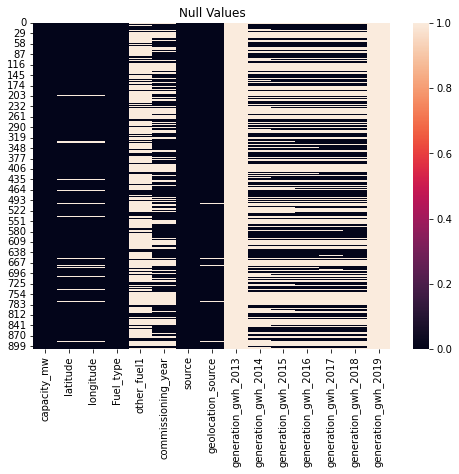

In [17]:
#Visualizeing null values
plt.figure(figsize=[8,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

I can notice a huge amount of null values in almost all columns except 2 columns, so i have treat them using imputation technique.

## Feature engineering:

In [18]:
#Lets extract Power_plant_age from commissioning_year by subtracting it from 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)

I have extracted Power_plant_age column from commissioning_year column and droped commissioning_year.I think Power_plant_age may contribute more than commissioning_year for our prediction.

## Imputation technique to replace NaN values:

In [19]:
#Checking for skewness
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
generation_gwh_2013         NaN
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
Power_plant_age        1.067949
dtype: float64

Except latitude all other columns are skewed.So in all other numerical columns i have to replace the NaN values with median.In latitude column i can replace NaN by mean.

In [20]:
#Replacing NaN values in numerical columns
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["Power_plant_age"] = df["Power_plant_age"].fillna(df["Power_plant_age"].median())
df["generation_gwh_2013"] = df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())

In [21]:
#Replacing null values in categorical columns
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

I have replaced all the null values in all columns.

In [22]:
#Checking null values after imputing
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
Fuel_type                0
other_fuel1              0
source                   0
geolocation_source       0
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018    459
generation_gwh_2019    907
Power_plant_age          0
dtype: int64

Now i don't have any null values in my dataset.

In [23]:

#Printing the dataset after replacing all nan values
df

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,NaN,801.123775,0.994875,233.596650,865.400000,686.500000,NaN,2.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,17.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,17.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,17.0


This is my dataset after removing all null values using imputation technique.

In [28]:
#Checking unique values of target column
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

Above are the unique values of capacity_mw column.

In [30]:
#Checking unique values of target column
df['Fuel_type'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

Above are the unique values of primary_fuel column.

In [31]:

#Checking for empty observations
df.loc[df['capacity_mw'] == " "]

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age


There is no empty observations in capacity_mw column.

In [34]:
#Checking for empty observations
df.loc[df['Fuel_type'] == " "]

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age


There is no empty observations in primary_fuel column also.

In [35]:
#Checking description of data set
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
count,907.000000,907.000000,907.000000,0.0,907.000000,907.000000,907.000000,907.000000,448.000000,0.0,907.000000
mean,326.223755,21.197918,77.427103,NaN,1516.689956,1510.071296,1565.361383,1657.121797,2600.804099,NaN,19.271224
std,590.085456,6.079148,4.815073,NaN,2785.604307,2984.994556,3005.087210,3046.862910,4314.880456,NaN,13.158621
min,0.000000,8.168900,68.644700,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,16.725000,17.072000,74.388900,NaN,801.123775,711.181225,737.205450,817.977250,193.378250,NaN,15.000000
50%,59.200000,21.281800,76.719500,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,17.000000
75%,385.250000,25.176450,79.206100,NaN,801.123775,711.181225,737.205450,817.977250,3143.535900,NaN,20.000000
max,4760.000000,34.649000,95.408000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,91.000000


By looking into the stats of the dataset i can say that.

All the null values has been removed.
There is a huge difference in mean and 2nq quantile of capacity_mw column which means there are extream outliers in the column.
Mean and 2nd quantile all other columns are almost same.
Mean of generation_gwh_2017 is high compared to other columns which means the power production is high in 2017.

## Visualization:

## Univariate Analysis:

In [36]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Fuel_type', 'other_fuel1', 'source', 'geolocation_source']


In [37]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'Power_plant_age']


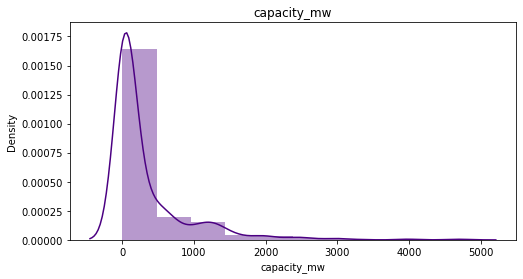

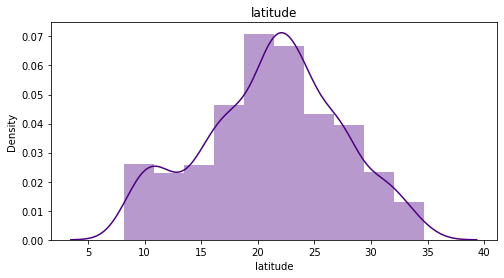

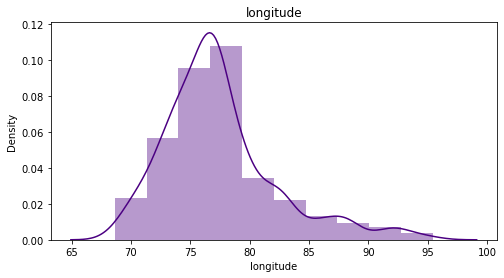

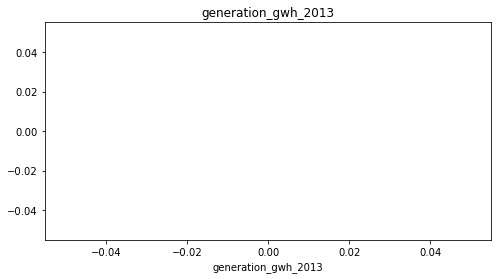

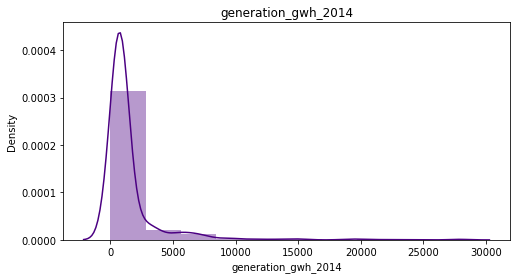

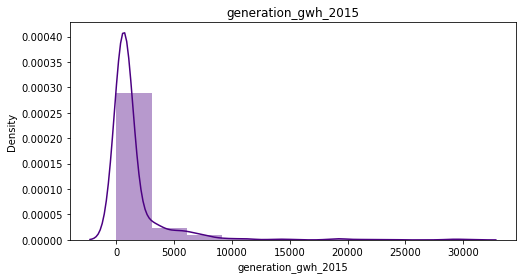

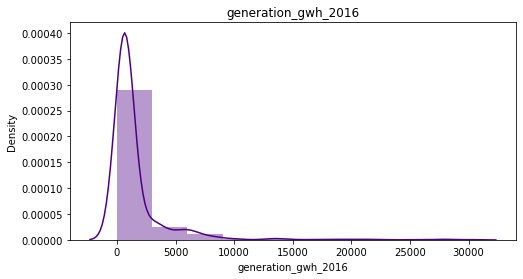

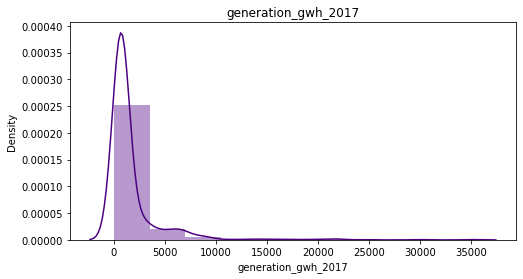

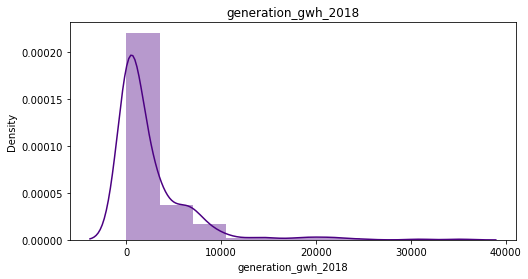

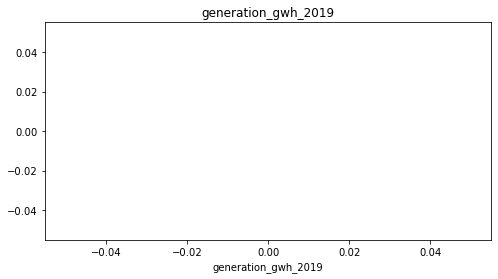

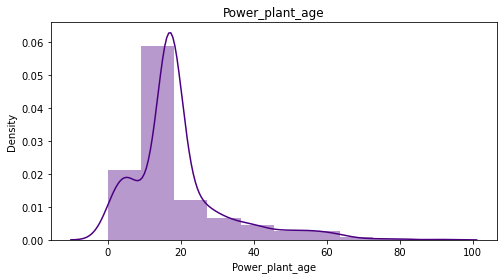

In [38]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

All other columns except latitude in list of continuous_columns has skewness.And i have to take care of this skewness.

In [41]:
#Checking the value counts of primary_fuel column
df.Fuel_type.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_type, dtype: int64

Above are the value counts of primary_fuel column.

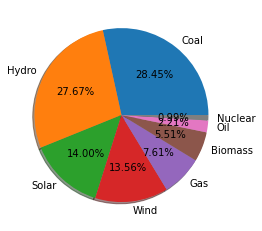

In [42]:
#Ploting pie chart for primary_fuel
labels='Coal','Hydro','Solar','Wind', 'Gas', 'Biomass', 'Oil', 'Nuclear'
fig, ax = plt.subplots()
ax.pie(df['Fuel_type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

It looks like most of the plants in INDIA uses Coal and Hydro as there fuel.And very less plants uses Nuclear fuel.

In [43]:
#Checking the value counts of other_fuel1 column
df.other_fuel1.value_counts()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

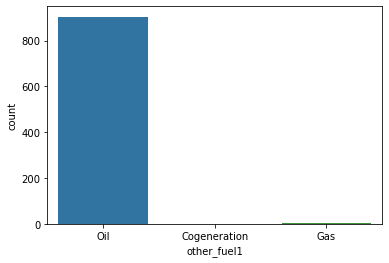

In [48]:
#Count plot for other_fuel1
sns.countplot(df['other_fuel1']);

It seems most of the plants are using Oil as the other_fuel.

In [44]:
#Checking the value counts of geolocation_source column
df.geolocation_source.value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

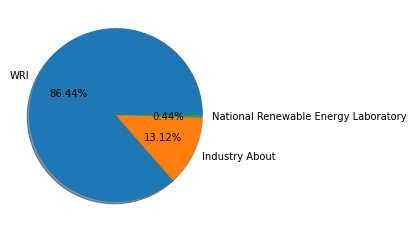

In [45]:
#Ploting pie chart for geolocation_source
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots()
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

So maximum power plants source is WRI.And very less plants has National Renewable Energy Laboratory as source.

## Bivariate Analysis:

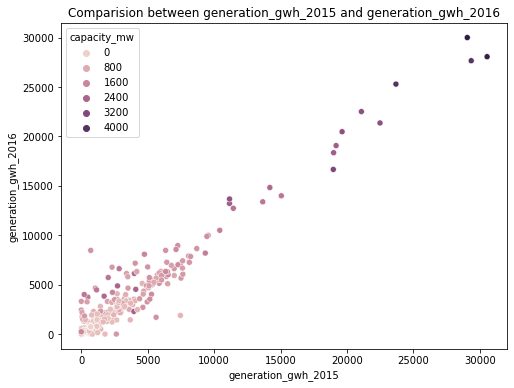

In [46]:

#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between generation_gwh_2015 and generation_gwh_2016')
sns.scatterplot(df['generation_gwh_2015'],df['generation_gwh_2016'],hue=df['capacity_mw']);

Here also i can see a linear relationship between generation of 2015 & 2016.And also the density of points is more in between o to 5000 which means less capacity power plants are more in number.

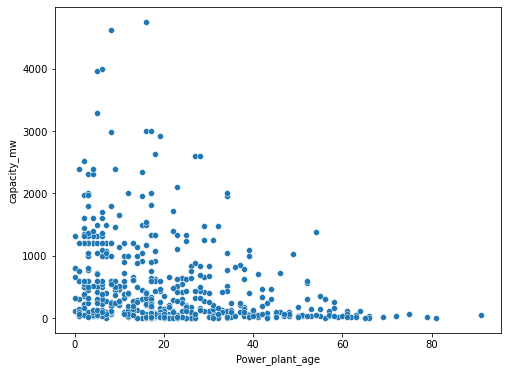

In [47]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
sns.scatterplot(x = "Power_plant_age", y = "capacity_mw", data = df)
plt.show()

From this we can say that older plants has less capacity than the plants started recently.

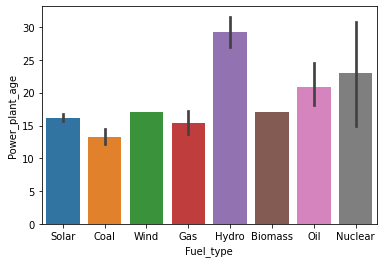

In [49]:
#Comparision between features using bar plot
sns.barplot(x = "Fuel_type", y = "Power_plant_age", data = df)
plt.show()

The aged plants uses Hydro, Nuclear, Oil as fuels.
The plants started recently uses Solar, Coal, Wind, Gas and Biomass as fuels.

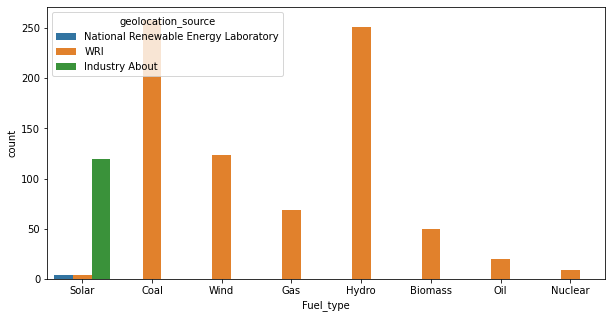

In [51]:
#Comparision between features using count plot
plt.figure(figsize = (10,5))
sns.countplot(x = "Fuel_type", hue = "geolocation_source", data = df)
plt.show()

Only in case of Solar fuel the source is of 3 types rather than that all other has WRI as geolocation_source.

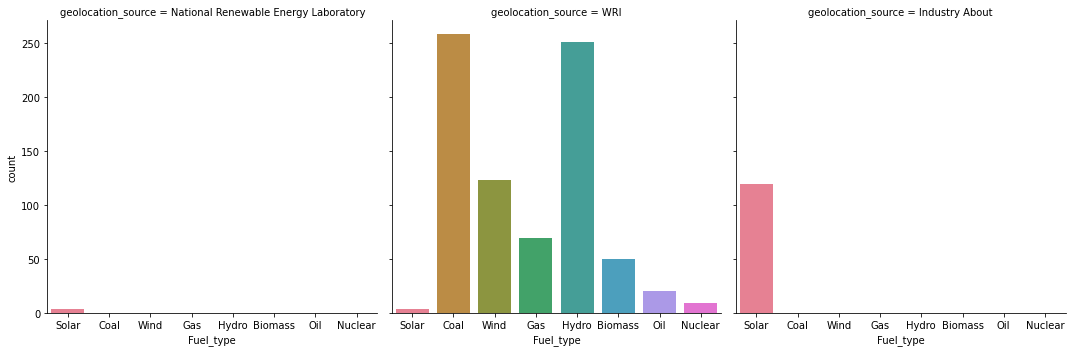

In [52]:
#Comparision between features using cat plot
sns.catplot(x='Fuel_type',col='geolocation_source',data=df,kind='count',palette="husl")

I can say that geolocation_source= WRI has all the types of fuels used bur Industry About and National Renewable Energy Laboratory has only solar as fuel.

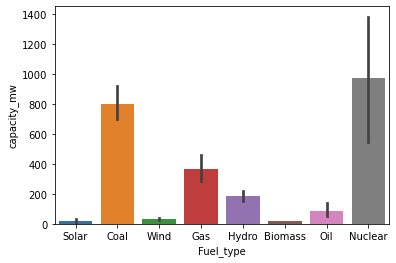

In [53]:
#Comparision between features using bar plot
sns.barplot(x = 'Fuel_type', y = 'capacity_mw', data = df)
plt.show()

The plant which uses Nuclear and Coal as fuel has more capacity than other plants uses other fuels.So to increase the power generation it is good to use Nuclear or Coal fuel.

## Data Cleaning:

## Checking for outliers:

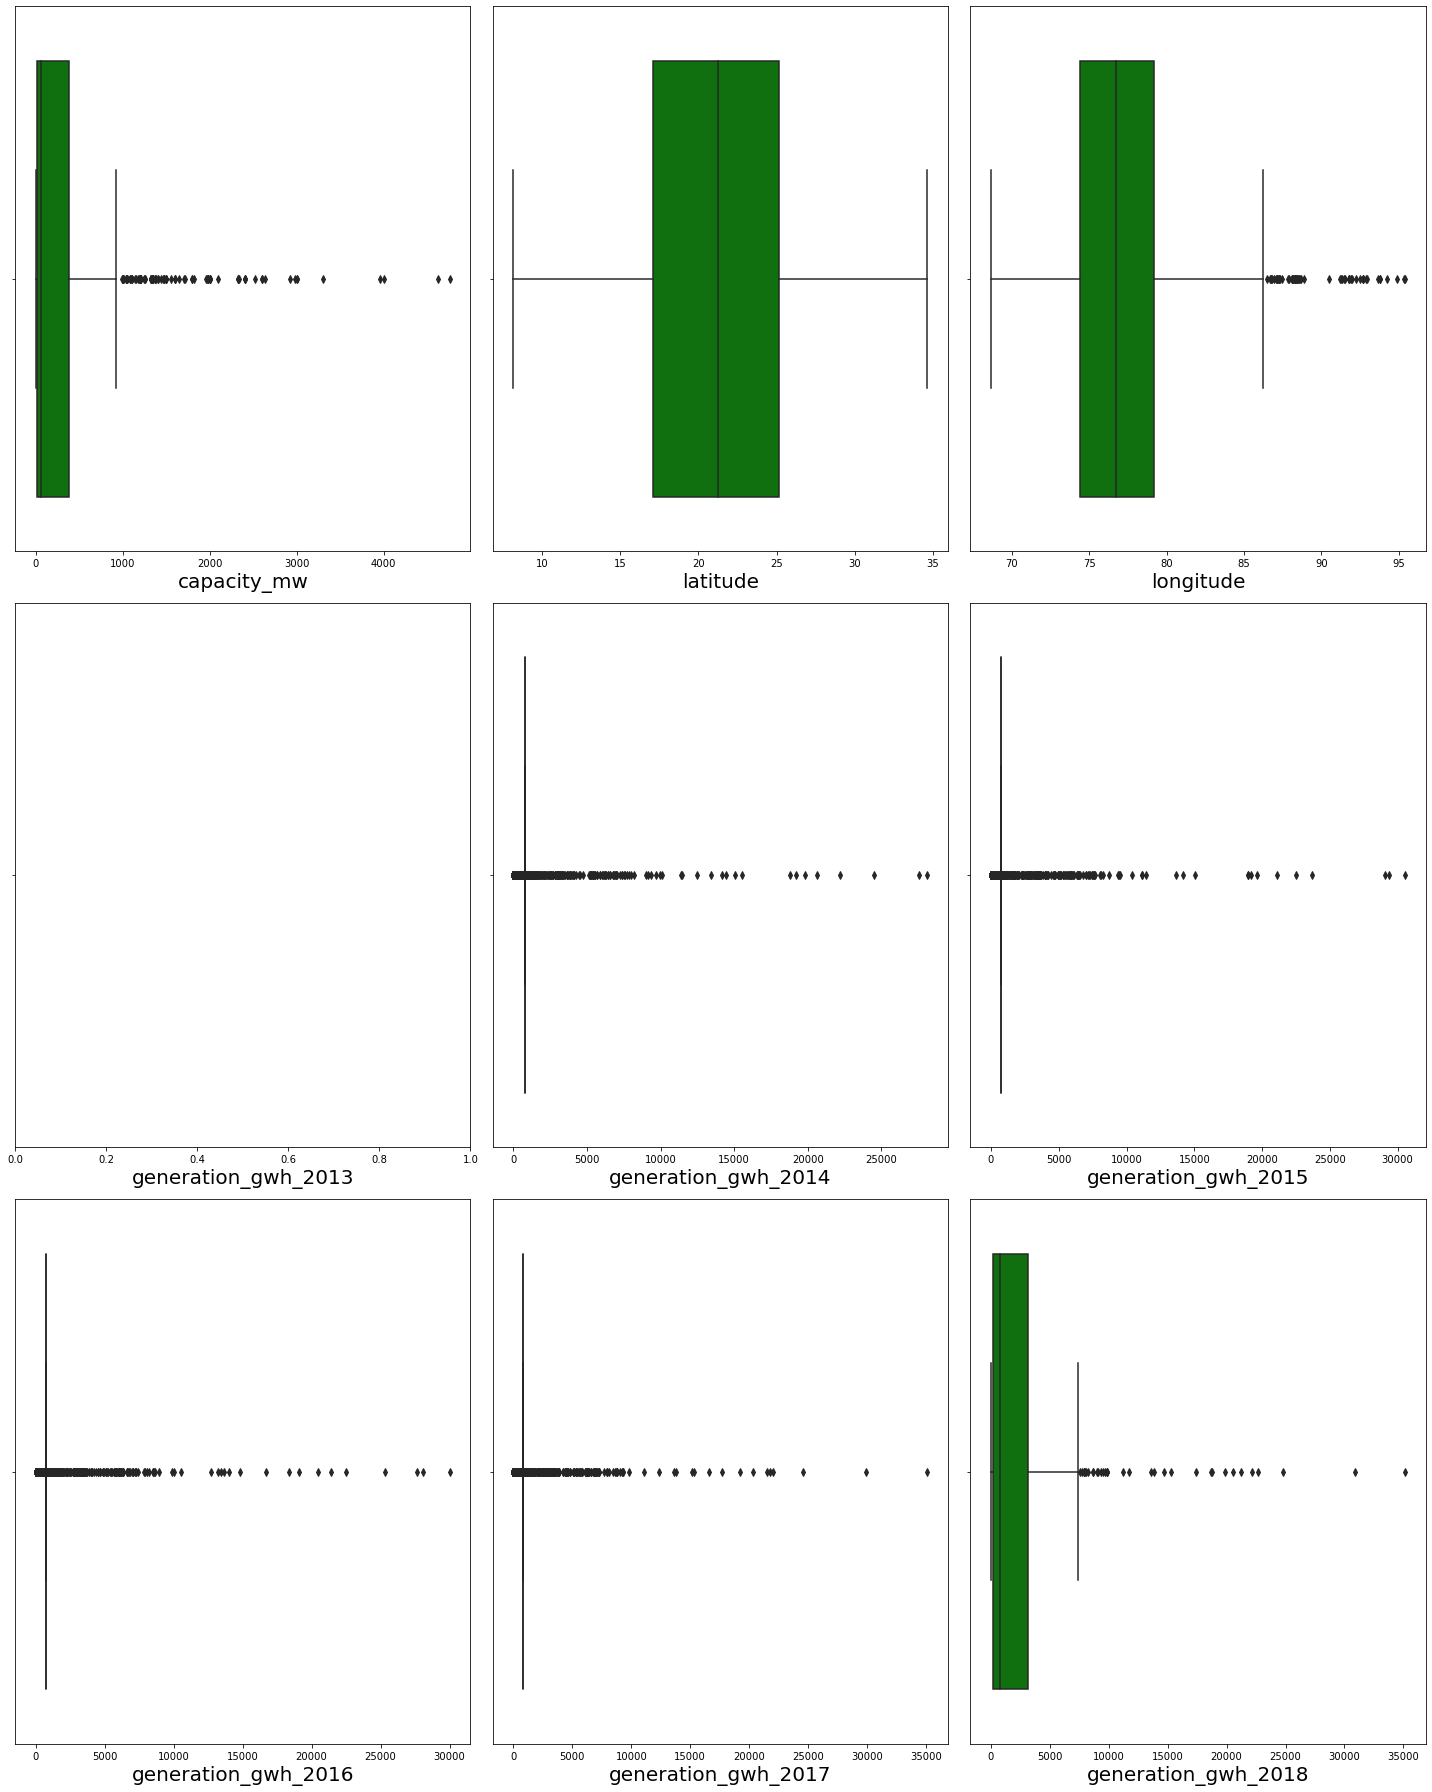

In [54]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Removing outliers:

## i) Zscore Method:

In [55]:
#Features having outliers
features=df[['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']]

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age


In [57]:
#Checking dataloss
Dataloss = (((908-852)/908)*100)
Dataloss

6.167400881057269

Using Zscore i have 6.16% data loss.Which is less than 10%.But still let me have a look into IQR method also.

## ii) IQR method:

In [58]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness using IQR method.

In [78]:
#Checking shape of new dataset
df_1.shape

(420, 15)

After removing outliers using IQR method i got 420 rows and 15 column.

In [79]:
#Checking shape of old dataset
df.shape

(907, 15)

In my old dataset i was having 907 rows and 15 columns.

In [59]:
#Checking dataloss
Dataloss = (((908-422)/908)*100)
Dataloss

53.524229074889874


There is a great dataloss in IQR method 

## Label Encoding:

In [66]:

cols=['Fuel_type','other_fuel1','geolocation_source','source']

I have taken all the column need to be encoded as a list cols.

In [67]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cols]= df_new[cols].apply(LE.fit_transform)

ValueError: Length of values (0) does not match length of index (4)